# Real Estate Dataset -Exploratory and Descriptive Analysis
This processing is focused on the data preparation 

In [4]:
import pandas as pd 
import numpy as np 
import os 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Define and Create Paths

In [5]:
# Get working directory 
current_dir = os.getcwd()

# Go one directory up to the root directory 
project_root_dir = os.path.dirname(current_dir)

data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')

# Define paths to results folder 
results_dir = os.path.join(project_root_dir,'results')

# Define paths to docs folder 
docs_dir = os.path.join(project_root_dir,'docs') 

#Create directories if they do not exist 
os.makedirs(raw_dir,exist_ok= True)
os.makedirs(processed_dir,exist_ok= True)
os.makedirs(results_dir,exist_ok= True)
os.makedirs(data_dir,exist_ok= True)

### Read in the data

In [9]:
real_estate_filename = os.path.join(processed_dir, 'real_estate_cleaned.csv')
real_estate = pd.read_csv(real_estate_filename)
real_estate

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Category
0,160091,2016,12/23/2016,Avon,2 EDGEWOOD,143390,224000.0,0.640134,Condo,appartments
1,160172,2016,4/13/2017,Bethel,66 H NASHVILLE ROAD,80500,130000.0,0.619231,Condo,appartments
2,160258,2016,6/29/2017,Bethel,1 EAGLE ROCK HILL,117180,200000.0,0.585900,Condo,appartments
3,16233,2016,6/9/2017,Darien,54 KENSETT LANE,887600,1495000.0,0.593712,Condo,appartments
4,1600249,2016,5/12/2017,Guilford,66-10 HIGH ST,409250,665000.0,0.615414,Condo,appartments
...,...,...,...,...,...,...,...,...,...,...
183272,190141,2019,4/20/2020,Wilton,26 FOX RUN,560840,640000.0,0.876300,Single Family,single-residence
183273,19200,2019,6/29/2020,Monroe,39 FARM VIEW RD,238400,377400.0,0.631700,Single Family,single-residence
183274,190480,2019,2/25/2020,New Haven,498 HOWARD AV,110740,248000.0,0.446500,Two Family,duplex-residence
183275,19022,2019,10/17/2019,Watertown,305 BEACH AVE,192800,235000.0,0.820400,Single Family,single-residence


## Visualisation.

In [10]:
# Check what variables are defined
%whos


Variable               Type         Data/Info
---------------------------------------------
current_dir            str          C:\Users\USER\Documents\k<...>-Estate-project\notebooks
data_dir               str          C:\Users\USER\Documents\k<...>\Real-Estate-project\data
docs_dir               str          C:\Users\USER\Documents\k<...>\Real-Estate-project\docs
np                     module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
os                     module       <module 'os' (frozen)>
pd                     module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                    module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
processed_dir          str          C:\Users\USER\Documents\k<...>te-project\data\processed
project_root_dir       str          C:\Users\USER\Documents\k<...>oject\Real-Estate-project
px                     module       <module 'plotly.express' <...>y\\express\\__init__.py'>
raw_dir              

In [20]:
real_estate['Sale Amount'].describe()

count    1.832770e+05
mean     3.584544e+05
std      7.790676e+05
min      0.000000e+00
25%      1.520000e+05
50%      2.350000e+05
75%      3.650000e+05
max      1.570000e+08
Name: Sale Amount, dtype: float64

C:\Users\USER\Documents\klab\setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


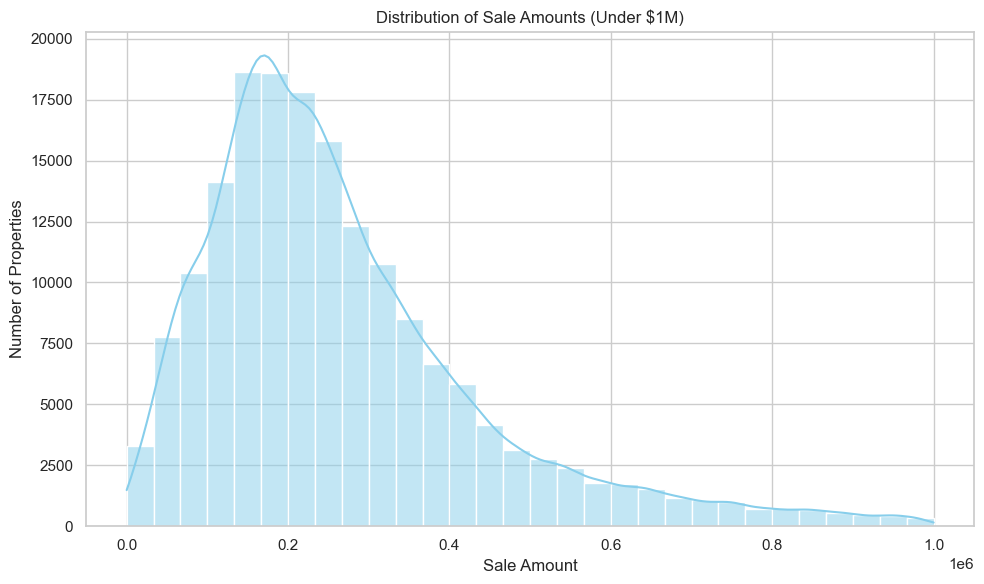

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(real_estate[real_estate['Sale Amount'] < 1_000_000]['Sale Amount'], 
             bins=30, kde=True, color='skyblue')

plt.title('Distribution of Sale Amounts (Under $1M)')
plt.xlabel('Sale Amount')
plt.ylabel('Number of Properties')
plt.tight_layout()

# Save before showing
plt.savefig(os.path.join(results_dir, 'Distribution_of_Sale_Amounts_Under_1M.jpg'))
plt.savefig(os.path.join(results_dir, 'Distribution_of_Sale_Amounts_Under_1M.png'))

plt.show()


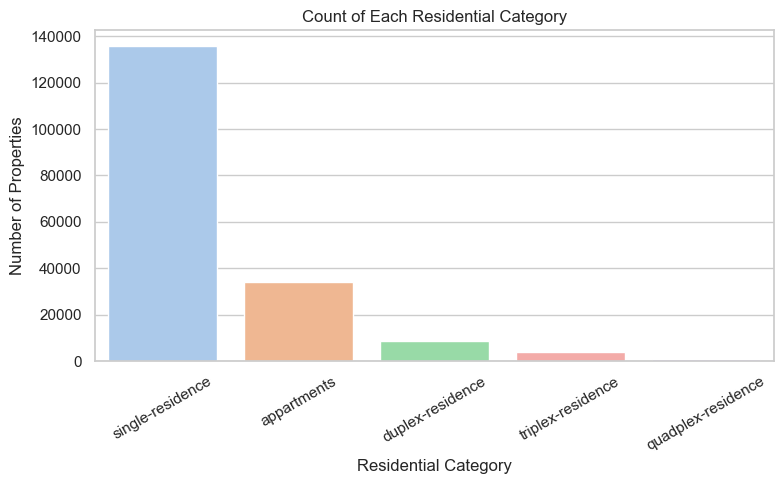

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(data=real_estate, 
              x='Residential Category', 
              order=real_estate['Residential Category'].value_counts().index, 
              palette='pastel')

plt.title('Count of Each Residential Category')
plt.xlabel('Residential Category')
plt.ylabel('Number of Properties')
plt.xticks(rotation=30)
plt.tight_layout()

# Save before showing
plt.savefig(os.path.join(results_dir, 'Count_of_Each_Residential_Category.jpg'))
plt.savefig(os.path.join(results_dir, 'Count_of_Each_Residential_Category.png'))

plt.show()



In [15]:
real_estate['Sales Ratio'].describe()


count    183277.000000
mean          3.134847
std         657.139410
min           0.000000
25%           0.589900
50%           0.667100
75%           0.782949
max      241910.000000
Name: Sales Ratio, dtype: float64

C:\Users\USER\Documents\klab\setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


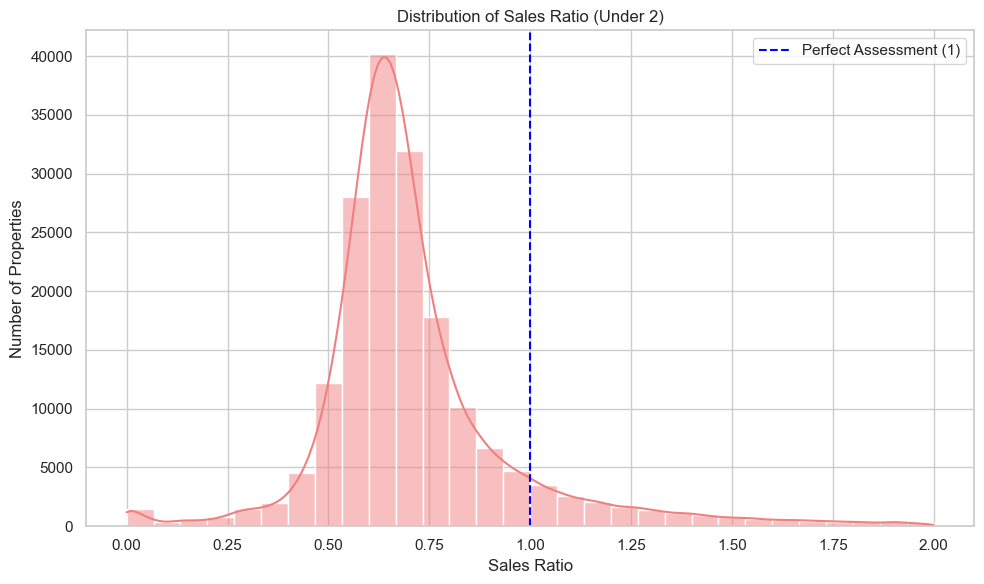

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(real_estate[real_estate['Sales Ratio'] < 2]['Sales Ratio'], bins=30, kde=True, color='lightcoral')

plt.title('Distribution of Sales Ratio (Under 2)')
plt.xlabel('Sales Ratio')
plt.ylabel('Number of Properties')
plt.axvline(1, color='blue', linestyle='--', label='Perfect Assessment (1)')
plt.legend()
plt.tight_layout()

# Save before showing
plt.savefig(os.path.join(results_dir, 'Distribution_of_Sales_Ratio_Under_2.jpg'))
plt.savefig(os.path.join(results_dir, 'Distribution_of_Sales_Ratio_Under_2.png'))

plt.show()



In [19]:
# #optional
# plt.figure(figsize=(10, 6))
# sns.histplot(real_estate[real_estate['Sales Ratio'] < 10]['Sales Ratio'], bins=30, kde=True, color='lightseagreen')

# plt.title('Distribution of Sales Ratio (Under 10)')
# plt.xlabel('Sales Ratio')
# plt.ylabel('Number of Properties')
# plt.axvline(1, color='blue', linestyle='--', label='Perfect Assessment (1)')
# plt.legend()
# plt.show()


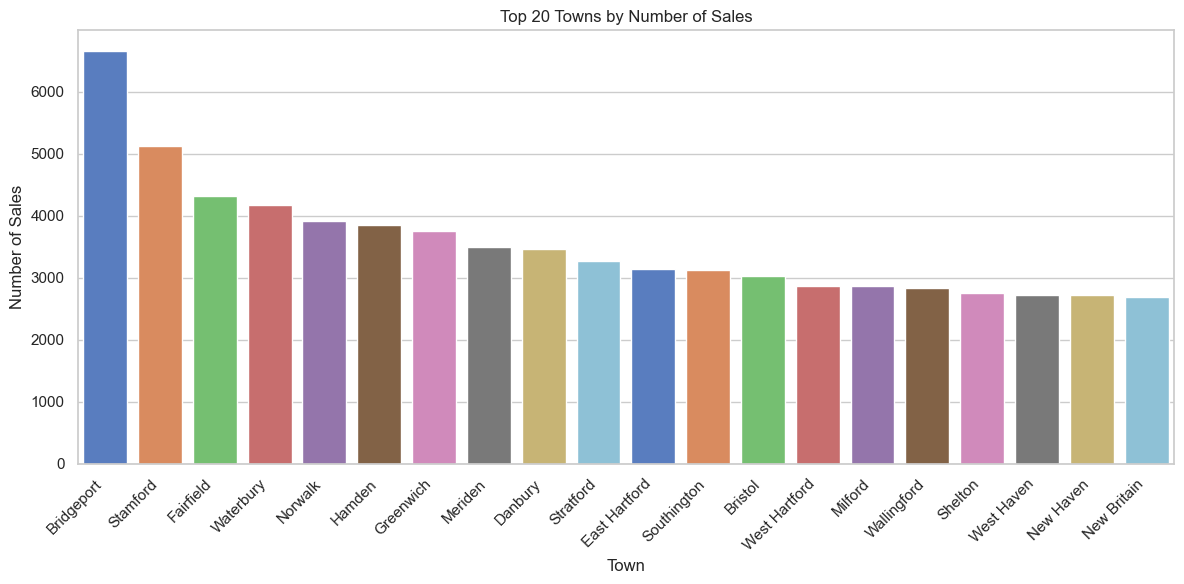

In [50]:
plt.figure(figsize=(12, 6))

# Get top 20 towns by count
top_towns = real_estate['Town'].value_counts().nlargest(20).index

sns.countplot(data=real_estate, x='Town', order=top_towns, palette='muted')

plt.title('Top 20 Towns by Number of Sales')
plt.xlabel('Town')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save before showing
plt.savefig(os.path.join(results_dir, 'Top_20_Towns_by_Number_of_Sales.jpg'))
plt.savefig(os.path.join(results_dir, 'Top_20_Towns_by_Number_of_Sales.png'))

plt.show()


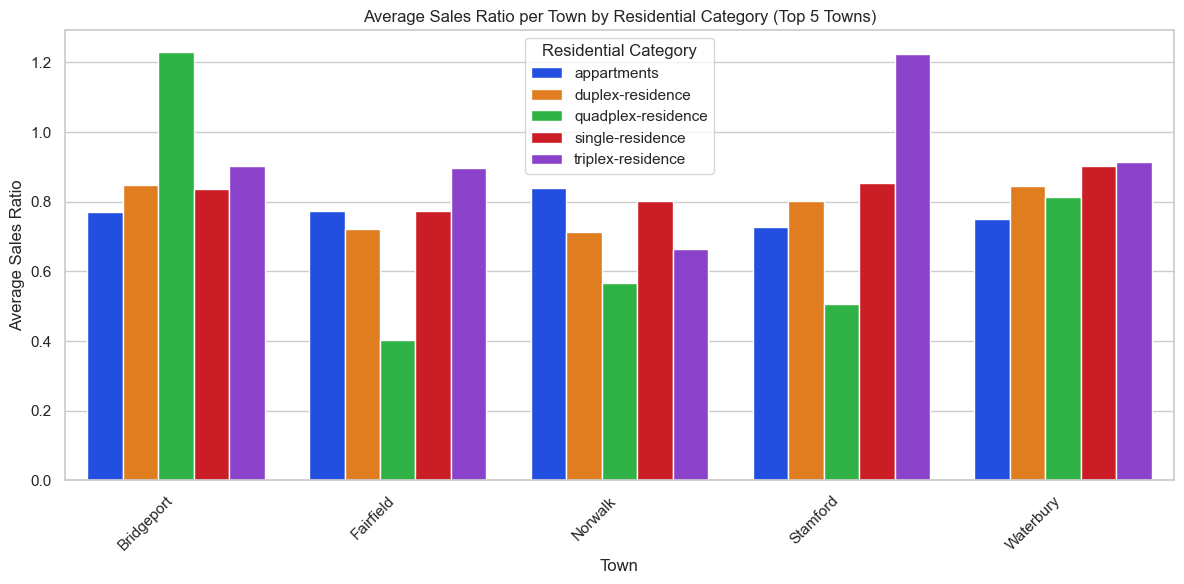

In [51]:
# Calculate average sales ratio by Town and Residential_Category
avg_sales_ratio = real_estate.groupby(['Town', 'Residential Category'])['Sales Ratio'].mean().reset_index()

# Select top 5 towns by number of sales
top_towns = real_estate['Town'].value_counts().nlargest(5).index
avg_sales_ratio_top = avg_sales_ratio[avg_sales_ratio['Town'].isin(top_towns)]

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_sales_ratio_top, x='Town', y='Sales Ratio', hue='Residential Category', palette='bright')

plt.title('Average Sales Ratio per Town by Residential Category (Top 5 Towns)')
plt.xlabel('Town')
plt.ylabel('Average Sales Ratio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Residential Category')
plt.tight_layout()
plt.show
plt.savefig(os.path.join(results_dir, 'income_distribution_by_agegroup_bar_plot.jpg'))
plt.savefig(os.path.join(results_dir, 'income_distribution_by_agegroup_bar_plot.png'))




C:\Users\USER\Documents\klab\setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\Documents\klab\setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


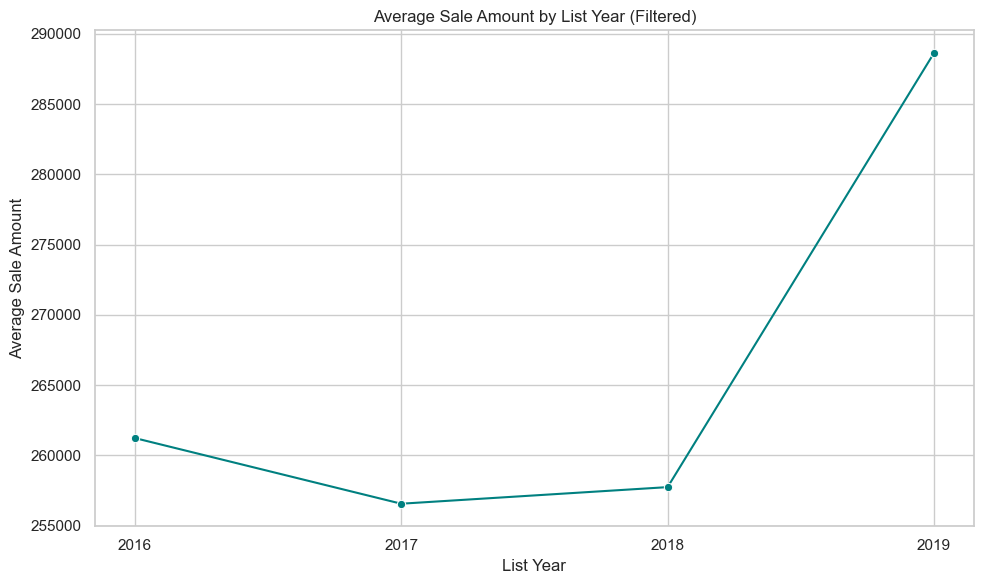

In [47]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_sale_by_year, x='List Year', y='Sale Amount', marker='o', color='teal')

plt.title('Average Sale Amount by List Year (Filtered)')
plt.xlabel('List Year')
plt.ylabel('Average Sale Amount')
plt.grid(True)
plt.tight_layout()

# Save first!
plt.savefig(os.path.join(results_dir, 'Average_Sale_Amount_by_List_Year.jpg'))
plt.savefig(os.path.join(results_dir, 'Average_Sale_Amount_by_List_Year.png'))

# Now show
plt.show()


In [55]:
# #optional
# median_sale_by_year = filtered_data.groupby('List Year')['Sale Amount'].median().reset_index()

# median_sale_by_year['List Year'] = median_sale_by_year['List Year'].astype(str)

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=median_sale_by_year, x='List Year', y='Sale Amount', marker='o', color='purple')

# plt.title('Median Sale Amount by List Year (Filtered)')
# plt.xlabel('List Year')
# plt.ylabel('Median Sale Amount')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


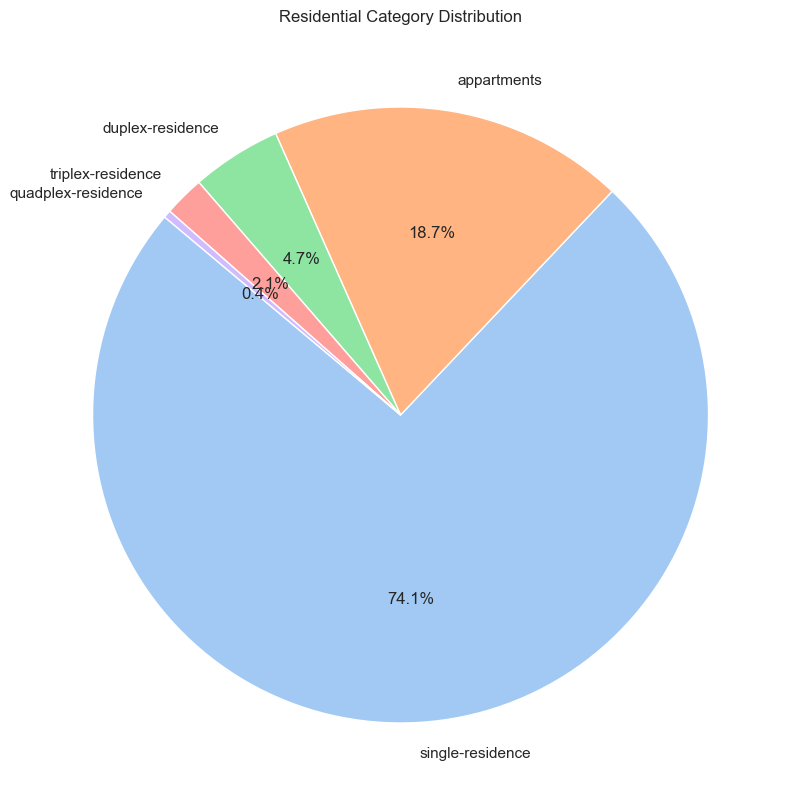

In [43]:
# Count residential categories
res_cat_counts = real_estate['Residential Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(res_cat_counts, labels=res_cat_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Residential Category Distribution')

# Save as image
plt.savefig(os.path.join(results_dir, 'Residential_Category_Distribution.jpg'))
plt.savefig(os.path.join(results_dir, 'Residential_Category_Distribution.png'))

plt.show()
